In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget
import pickle
from MARBLE import utils, plotting, net, postprocessing, geometry

import matplotlib.pyplot as plt
import numpy as np
from glob import glob

# Visualise a single condition in a single session

Performed MDS embedding on embedded results.
Performed MDS embedding on embedded results.
Performed MDS embedding on embedded results.
Performed MDS embedding on embedded results.
Performed MDS embedding on embedded results.
Performed MDS embedding on embedded results.
Performed MDS embedding on embedded results.
Performed MDS embedding on embedded results.
Performed MDS embedding on embedded results.
Performed MDS embedding on embedded results.
Performed MDS embedding on embedded results.
Performed MDS embedding on embedded results.
Performed MDS embedding on embedded results.
Performed MDS embedding on embedded results.
Performed MDS embedding on embedded results.
Performed MDS embedding on embedded results.
Performed MDS embedding on embedded results.
Performed MDS embedding on embedded results.
Performed MDS embedding on embedded results.
Performed MDS embedding on embedded results.
Performed MDS embedding on embedded results.
Performed MDS embedding on embedded results.
Performed 

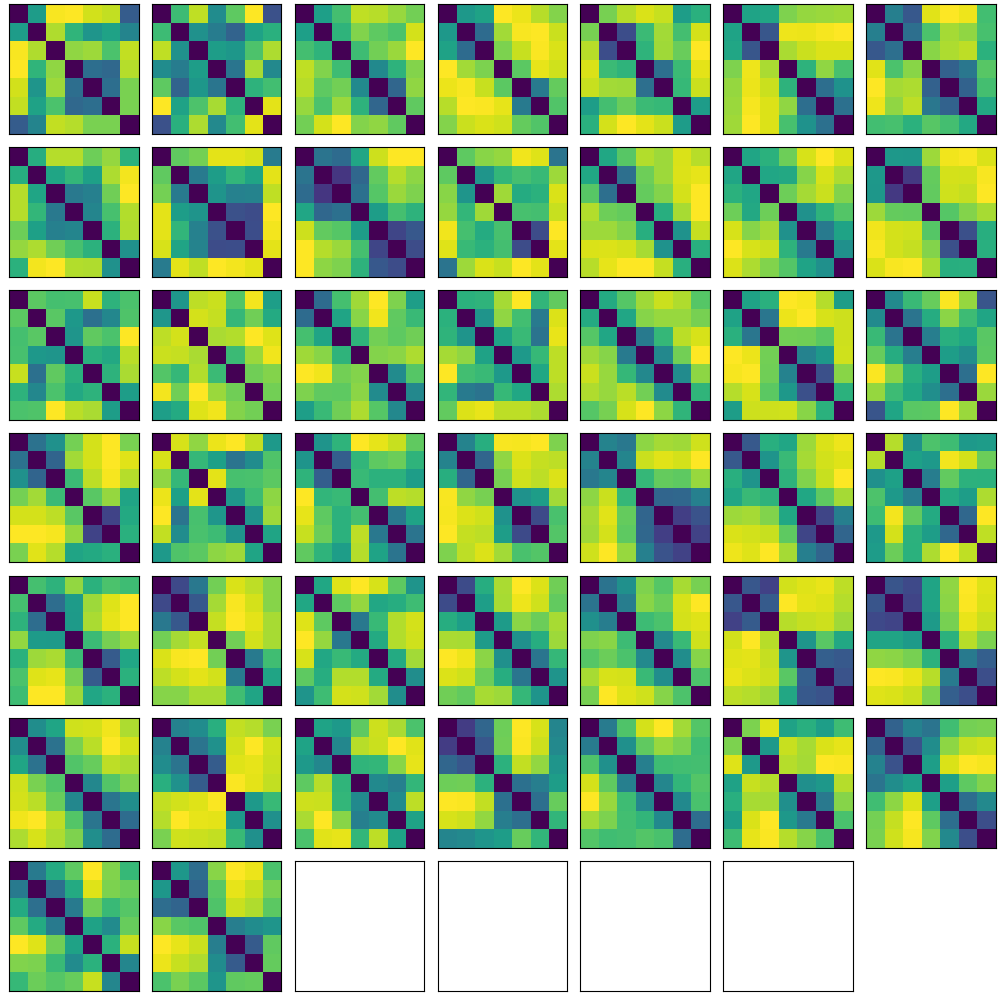

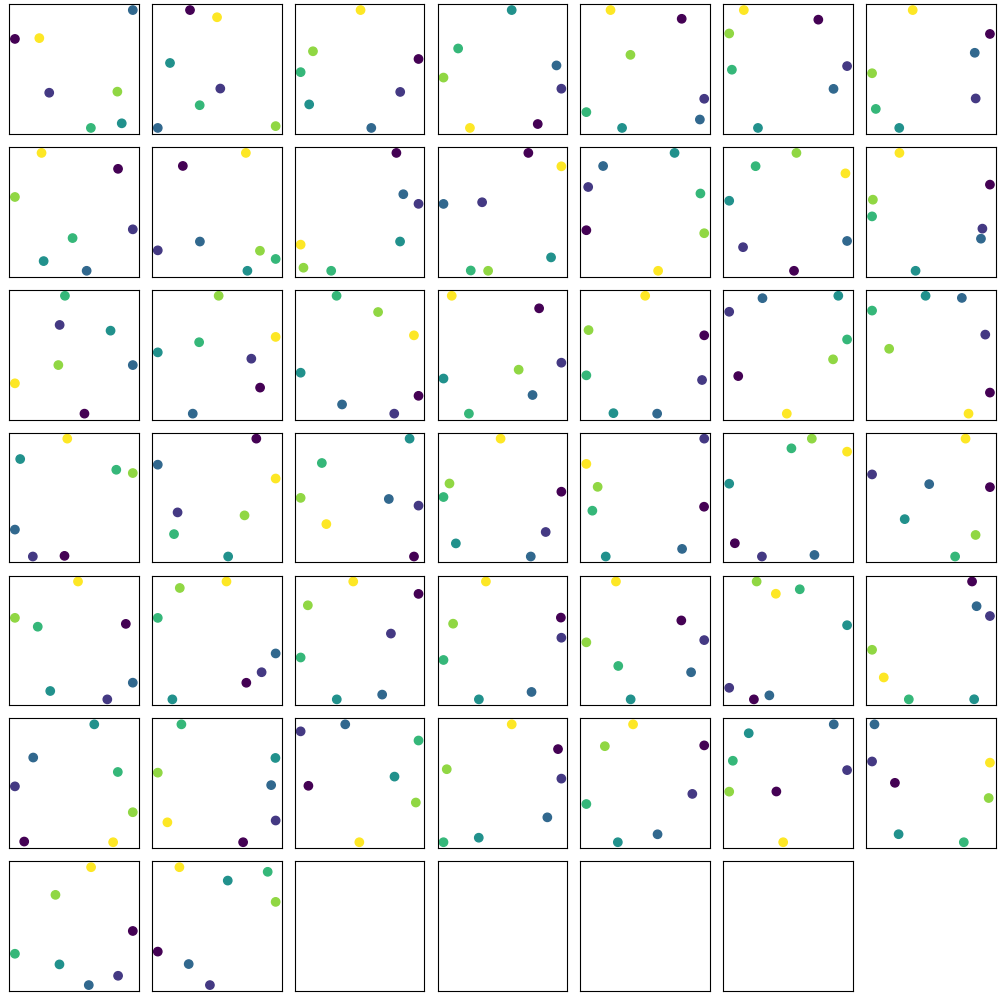

In [2]:
rows, cols = 7, 7
fig1, axs1 = plt.subplots(rows, cols, constrained_layout=True, figsize=(10,10))
plt.axis('off')
fig2, axs2 = plt.subplots(rows, cols, constrained_layout=True, figsize=(10,10))
plt.axis('off')
conditions = ['DownLeft','Left','UpLeft','Up','UpRight','Right','DownRight']
labels = [i for i in range(len(conditions))]

dist = []
for i in range(49):
    if i<44:
        data = pickle.load(open('../outputs/spiking_data/data_object_session_{}.pkl'.format(i),'rb'))
        #model = net(data, loadpath='../outputs/spiking_data/session_{}/best_model.pth'.format(i), verbose=False)
        #data = model.evaluate(data)
        #data = postprocessing(data)
        dist.append(data.dist)
        emb_MDS, _ = geometry.embed(data.dist, embed_typ = 'MDS')
        axs1[i//cols, i%cols].imshow(data.dist, interpolation='nearest')
        axs2[i//cols, i%cols].scatter(emb_MDS[:,0],emb_MDS[:,1],c=np.linspace(0,6,7))
    
    axs1[i//cols, i%cols].get_xaxis().set_ticks([])
    axs1[i//cols, i%cols].get_yaxis().set_ticks([])
    #ax.colorbar()
    
    axs2[i//cols, i%cols].get_xaxis().set_ticks([])
    axs2[i//cols, i%cols].get_yaxis().set_ticks([])

# Condition averaged results

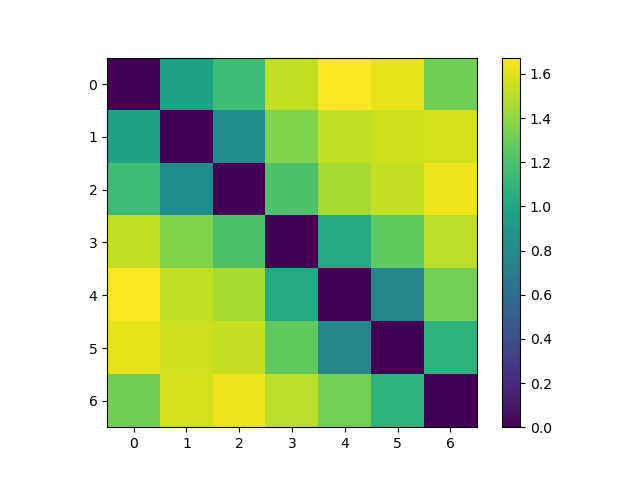

In [4]:
dist_condition_avg = np.stack(dist, axis=0).mean(0)
plt.figure()
plt.imshow(dist_condition_avg)
plt.colorbar()  
plt.savefig('./outputs/condition_distance.svg')
plt.show()

Performed MDS embedding on embedded results.


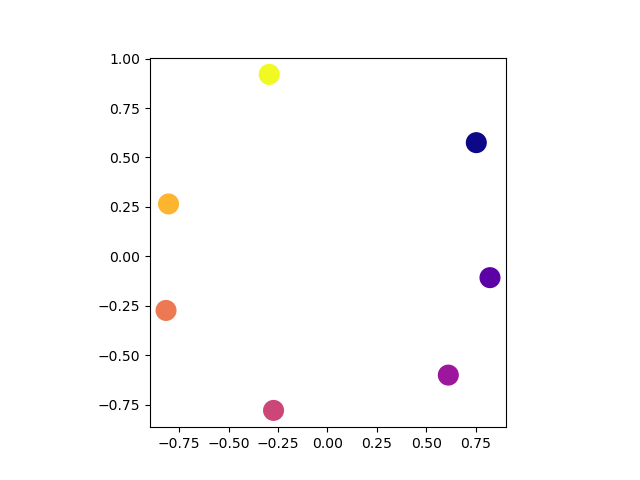

In [18]:
emb_MDS, _ = geometry.embed(dist_condition_avg, embed_typ = 'MDS')
plt.figure()
plt.scatter(emb_MDS[:,0],emb_MDS[:,1],c=np.linspace(0,6,7),cmap='plasma',s=200)
plt.gca().set_aspect('equal', 'box')
plt.savefig('./outputs/MDS_embedding_conditions.svg')

<AxesSubplot:>

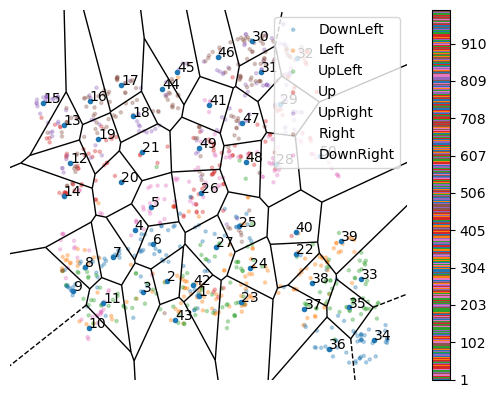

In [8]:
plotting.embedding(data, data.y.numpy().astype(int), titles=conditions)

In [154]:
data = pickle.load(open('../outputs/spiking_data/data_object_session_39_3Dout.pkl'.format(i),'rb'))
pos, vel, time, condition = pickle.load(open('../outputs/spiking_data/raw_data_session_39.pkl'.format(i),'rb'))
time = np.hstack(time)
#emb = geometry.embed(data.out, embed_typ='PCA', dim_emb=3)[0]

In [147]:
data.time[0]*np.arange(0,137,10)

ValueError: operands could not be broadcast together with shapes (1310,) (14,) 

In [143]:
s = data._slice_dict['x']
for i, _ in enumerate(s[:-1]):
    r = range(s[i],s[i+1])
    ind = np.argsort(data.sample_ind[r])
    data.sample_ind[r] = data.sample_ind[r][ind]
    emb[r] = emb[r][ind]
    data.time[i] = data.time[i][ind]

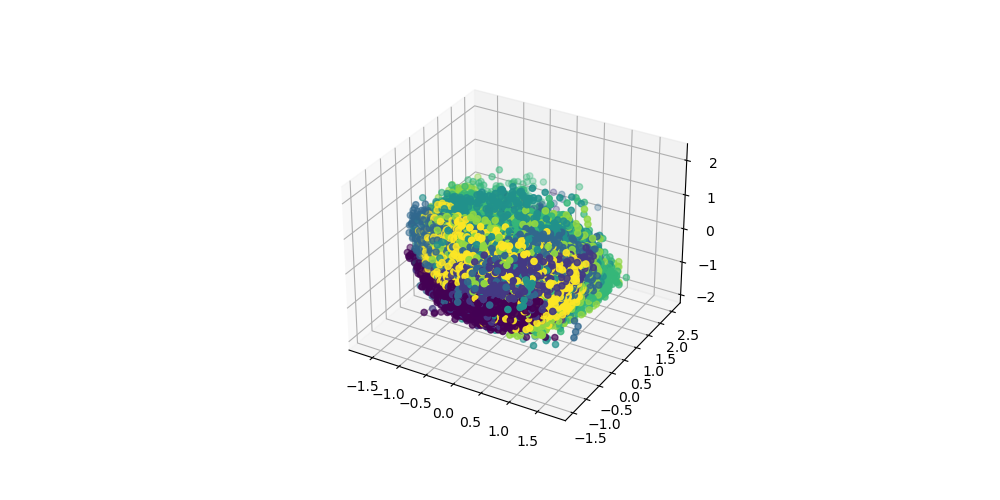

In [156]:
import matplotlib.cm as cm

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(projection='3d')

ax.scatter(data.out[:,0], data.out[:,1], data.out[:,2], c=cm.viridis(data.y/6))#, s=time/4)

#ax.view_init(elev=10., azim=90)

#plt.savefig('../outputs/trajectories.svg')

In [118]:
geometry.compute_distribution_distances(clusters=data.clusters, slices=None)

TypeError: object of type 'NoneType' has no len()

In [136]:
np.sort(data.sample_ind[slices[0]:slices[1]])

array([   0,    5,   11, ..., 5407, 5416, 5420])

In [ ]:
time_periods = np.arange(0,137,10)

distance_matrices = []
for d in range(len(embeddings)):
    
    embedding = embeddings[d]
    label = np.hstack(labels[d])
    times = np.hstack(timepoints[d])
    
    sub_embeddings = []
    
    for c,cond in enumerate(conditions):
        for period  in time_periods:
            indexes =  (label==c) * (times==period) #* (times>=period[0]) * (times<period[1])
            sub_emb = embedding[indexes].numpy()
            
            sub_embeddings.append(sub_emb)
            
    
    distances = np.zeros([len(sub_embeddings), len(sub_embeddings)])
    for i in range(len(sub_embeddings)):
        for j in range(len(sub_embeddings)):
            if i==j:
                distances[i,j] = 0
            else:
                distances[i,j] = pairwise_distances(sub_embeddings[i],sub_embeddings[j]).mean()
    
    distances = distances/np.std(distances)
    
    distance_matrices.append(distances)

In [148]:
time_periods = np.arange(0,137,10)
for period in time_periods:
    print(period)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
